### Import modules

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

### Create Spark Session

In [5]:
spark_session = SparkSession.builder.appName("Post_Season").getOrCreate()

### Create the Spark DataFrame

In [6]:
df = spark_session.read.csv("BattingPost.csv", inferSchema=True, header=True)

### View inside csv file

In [7]:
df.printSchema()

root
 |-- yearID: integer (nullable = true)
 |-- round: string (nullable = true)
 |-- playerID: string (nullable = true)
 |-- teamID: string (nullable = true)
 |-- lgID: string (nullable = true)
 |-- G: integer (nullable = true)
 |-- AB: integer (nullable = true)
 |-- R: integer (nullable = true)
 |-- H: integer (nullable = true)
 |-- 2B: integer (nullable = true)
 |-- 3B: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- RBI: integer (nullable = true)
 |-- SB: integer (nullable = true)
 |-- CS: integer (nullable = true)
 |-- BB: integer (nullable = true)
 |-- SO: integer (nullable = true)
 |-- IBB: integer (nullable = true)
 |-- HBP: integer (nullable = true)
 |-- SH: integer (nullable = true)
 |-- SF: integer (nullable = true)
 |-- GIDP: integer (nullable = true)



### Apply a filter

In [9]:
df.filter(df['H']>10).show()

+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+
|yearID|round| playerID|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB|  CS| BB| SO|IBB| HBP|  SH|  SF|GIDP|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+
|  1885|   WS|ansonca01|   CHN|  NL|  7| 26|  8| 11|  1|  1|  0|  0|  0|null|  2|  0|  0|null|null|null|null|
|  1885|   WS|pfefffr01|   CHN|  NL|  7| 27|  5| 11|  2|  0|  1|  0|  0|null|  0|  0|  0|null|null|null|null|
|  1887|   WS|bennech01|   DTN|  NL| 11| 42|  6| 11|  2|  1|  0|  9|  5|null|  3|  5|  0|null|null|null|null|
|  1887|   WS|carutbo01|   SL4|  AA| 10| 46|  2| 11|  0|  0|  0|  3|  3|null|  1|  1|  0|null|null|null|null|
|  1887|   WS|comisch01|   SL4|  AA| 15| 62|  8| 19|  2|  0|  0|  5|  4|null|  1|  1|  0|null|null|null|null|
|  1887|   WS|ganzech01|   DTN|  NL| 14| 58|  5| 13|  1|  0|  0|  2|  3|null|  1|  2|  0|null|null|null|null|
|  1887|  

### Another one

In [10]:
df.filter(df.HR > 3).show()

+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|yearID|round| playerID|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO|IBB|HBP| SH| SF|GIDP|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|  1926|   WS| ruthba01|   NYA|  AL|  7| 20|  6|  6|  0|  0|  4|  5|  1|  1| 11|  2|  1|  0|  0|  0|   0|
|  1928|   WS|gehrilo01|   NYA|  AL|  4| 11|  5|  6|  1|  0|  4|  9|  0|  0|  6|  0|  0|  0|  0|  0|   0|
|  1952|   WS|snidedu01|   BRO|  NL|  7| 29|  5| 10|  2|  0|  4|  8|  1|  0|  1|  5|  0|  1|  0|  0|   1|
|  1955|   WS|snidedu01|   BRO|  NL|  7| 25|  5|  8|  1|  0|  4|  7|  0|  0|  2|  6|  1|  0|  1|  0|   0|
|  1958|   WS|bauerha01|   NYA|  AL|  7| 31|  6| 10|  0|  0|  4|  8|  0|  0|  0|  5|  0|  0|  0|  0|   1|
|  1971| NLCS|roberbo01|   PIT|  NL|  4| 16|  5|  7|  1|  0|  4|  6|  0|  0|  0|  2|  0|  0|  0|  0|   0|
|  1972|   WS|tenacge01|   OAK|  AL|  7| 23|  

### Groupby example

In [11]:
df.groupBy(["yearID","playerID","H", "AB"]).count().orderBy(F.desc('yearID')).show()

+------+---------+---+---+-----+
|yearID| playerID|  H| AB|count|
+------+---------+---+---+-----+
|  2018|chaveje01|  0|  0|    1|
|  2018|gomesya01|  2|  8|    1|
|  2018| shawtr01|  4| 19|    1|
|  2018|tayloch03|  8| 22|    1|
|  2018|lestejo01|  0|  1|    1|
|  2018|reddijo01|  3| 16|    1|
|  2018|pearcst01|  4| 12|    2|
|  2018|betande01|  0|  0|    2|
|  2018|pederjo01|  4| 14|    1|
|  2018|altuvjo01|  4| 14|    1|
|  2018|mileywa01|  2|  4|    1|
|  2018|kershcl01|  0|  2|    1|
|  2018|freesda01|  2|  8|    1|
|  2018|newcose01|  0|  0|    1|
|  2018|mileywa01|  0|  2|    1|
|  2018|heywaja01|  0|  3|    1|
|  2018|friedma01|  0|  0|    1|
|  2018|arciaor01|  9| 25|    1|
|  2018|hollima01|  1|  5|    1|
|  2018|vazquch01|  2| 13|    1|
+------+---------+---+---+-----+
only showing top 20 rows



### SQL Quieres

### Make temporary table from a query

In [12]:
df.createOrReplaceTempView("Post_Season_Batting")

In [13]:
spark_session.sql("""

    SELECT 
    *
    FROM 
    Post_Season_Batting
    WHERE
    AB > 10
    AND
    ROUND = 'WS'
    AND
    HR > 4
    AND
    YEARID > 1950
    ORDER BY 
    YEARID
""").show()

+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|yearID|round| playerID|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO|IBB|HBP| SH| SF|GIDP|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|  1977|   WS|jacksre01|   NYA|  AL|  6| 20| 10|  9|  1|  0|  5|  8|  0|  0|  3|  4|  0|  1|  0|  0|   1|
|  2009|   WS|utleych01|   PHI|  NL|  6| 21|  7|  6|  1|  0|  5|  8|  1|  0|  4|  5|  1|  0|  0|  0|   2|
|  2017|   WS|springe01|   HOU|  AL|  7| 29|  8| 11|  3|  0|  5|  7|  0|  0|  5|  8|  1|  0|  0|  0|   0|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+



### Now use matplotlib for some graphics

In [14]:
%matplotlib inline

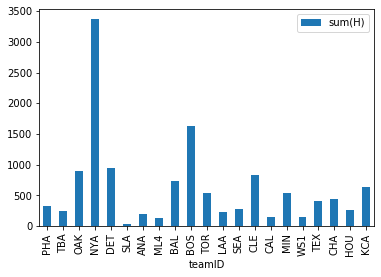

In [15]:
df[df.lgID == 'AL'].groupBy('teamID').sum('H').toPandas().plot(
x = 'teamID',
y = 'sum(H)',
kind = "bar"
)

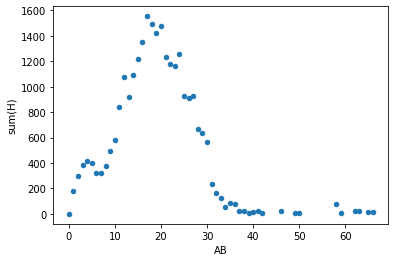

In [16]:
df.groupBy("AB").sum("H").toPandas().plot(
    x = "AB",
    y = "sum(H)",
    kind = "scatter"
)

### Random EDA

In [17]:
df[df.teamID == 'BOS'].describe('H').show()

+-------+------------------+
|summary|                 H|
+-------+------------------+
|  count|               816|
|   mean|1.9938725490196079|
| stddev| 2.766799076948411|
|    min|                 0|
|    max|                14|
+-------+------------------+



In [18]:
df.select([F.mean('H'), F.min('yearID'), F.max('AB')]).show()

+------------------+-----------+-------+
|            avg(H)|min(yearID)|max(AB)|
+------------------+-----------+-------+
|1.8612930193674238|       1884|     66|
+------------------+-----------+-------+



In [19]:
df.stat.cov('H', "HR")

0.6878772473914809

In [20]:
df.stat.corr('H',"HR")

0.496207226481733

### Add Batting Average to end of table

In [23]:
df1 = df.withColumn('BA', df['H'] / df['AB'])

In [25]:
df1.show()

+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+------------------+
|yearID|round| playerID|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB|  CS| BB| SO|IBB| HBP|  SH|  SF|GIDP|                BA|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+------------------+
|  1884|   WS|becanbu01|   NY4|  AA|  1|  2|  0|  1|  0|  0|  0|  0|  0|null|  0|  0|  0|null|null|null|null|               0.5|
|  1884|   WS|bradyst01|   NY4|  AA|  3| 10|  1|  0|  0|  0|  0|  0|  0|null|  0|  1|  0|null|null|null|null|               0.0|
|  1884|   WS|carrocl01|   PRO|  NL|  3| 10|  2|  1|  0|  0|  0|  1|  0|null|  1|  1|  0|null|null|null|null|               0.1|
|  1884|   WS|dennyje01|   PRO|  NL|  3|  9|  3|  4|  0|  1|  1|  2|  0|null|  0|  3|  0|null|null|null|null|0.4444444444444444|
|  1884|   WS|esterdu01|   NY4|  AA|  3| 10|  0|  3|  1|  0|  0|  0|  1|null|  0|  3|  0|null|nul

In [16]:
df1 = df.withColumn('X1B', df['H'] - df['2B'] - df['3B'] - df['HR'])

In [18]:
df1 = df.withColumn('TB', df['H'] - (df['2B']*2) + (df['3B']*3) + (df['HR']*4))

In [19]:
df1.show()

+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+---+
|yearID|round| playerID|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB|  CS| BB| SO|IBB| HBP|  SH|  SF|GIDP| TB|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+---+
|  1884|   WS|becanbu01|   NY4|  AA|  1|  2|  0|  1|  0|  0|  0|  0|  0|null|  0|  0|  0|null|null|null|null|  1|
|  1884|   WS|bradyst01|   NY4|  AA|  3| 10|  1|  0|  0|  0|  0|  0|  0|null|  0|  1|  0|null|null|null|null|  0|
|  1884|   WS|carrocl01|   PRO|  NL|  3| 10|  2|  1|  0|  0|  0|  1|  0|null|  1|  1|  0|null|null|null|null|  1|
|  1884|   WS|dennyje01|   PRO|  NL|  3|  9|  3|  4|  0|  1|  1|  2|  0|null|  0|  3|  0|null|null|null|null| 11|
|  1884|   WS|esterdu01|   NY4|  AA|  3| 10|  0|  3|  1|  0|  0|  0|  1|null|  0|  3|  0|null|null|null|null|  1|
|  1884|   WS|farreja02|   PRO|  NL|  3|  9|  3|  4|  2|  0|  0|  0|  1|null|  0|  0|  0

In [20]:
df1 = df.withColumn('PA', df["AB"] + df['HBP'] + df['BB'] + df['SF'])

In [22]:
df1.show()

+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+----+
|yearID|round| playerID|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB|  CS| BB| SO|IBB| HBP|  SH|  SF|GIDP|  PA|
+------+-----+---------+------+----+---+---+---+---+---+---+---+---+---+----+---+---+---+----+----+----+----+----+
|  1884|   WS|becanbu01|   NY4|  AA|  1|  2|  0|  1|  0|  0|  0|  0|  0|null|  0|  0|  0|null|null|null|null|null|
|  1884|   WS|bradyst01|   NY4|  AA|  3| 10|  1|  0|  0|  0|  0|  0|  0|null|  0|  1|  0|null|null|null|null|null|
|  1884|   WS|carrocl01|   PRO|  NL|  3| 10|  2|  1|  0|  0|  0|  1|  0|null|  1|  1|  0|null|null|null|null|null|
|  1884|   WS|dennyje01|   PRO|  NL|  3|  9|  3|  4|  0|  1|  1|  2|  0|null|  0|  3|  0|null|null|null|null|null|
|  1884|   WS|esterdu01|   NY4|  AA|  3| 10|  0|  3|  1|  0|  0|  0|  1|null|  0|  3|  0|null|null|null|null|null|
|  1884|   WS|farreja02|   PRO|  NL|  3|  9|  3|  4|  2|  0|  0|  0|  1|null|  0

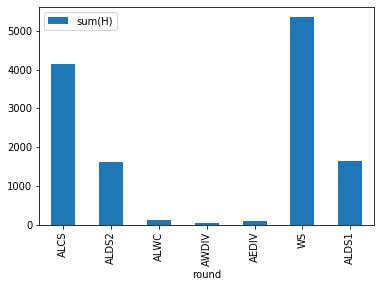

In [25]:
df[df.lgID == 'AL'].groupBy('round').sum('H').toPandas().plot(
x = 'round',
y = 'sum(H)',
kind = "bar"
)

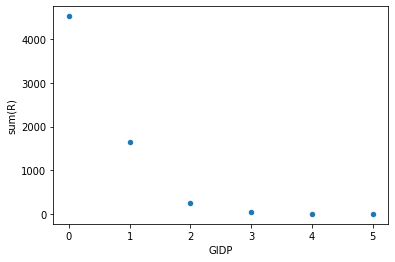

In [32]:
df[df.lgID == 'AL'].groupBy('GIDP').sum('R').toPandas().plot(
x = 'GIDP',
y = 'sum(R)',
kind = "scatter"
)